In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
!ls ../../all/

data_description.txt     test.csv                 train.csv.gz
sample_submission.csv    test.csv.gz
sample_submission.csv.gz train.csv


In [3]:
#change the data path here
data = pd.read_csv("../../all/train.csv", index_col = 0)

In [4]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


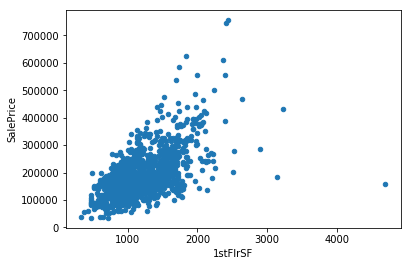

In [5]:
%matplotlib inline
data.plot(x = "1stFlrSF", y = "SalePrice", kind = 'scatter')

In [59]:
import seaborn as sns

def reg_plots(df, target):
    columns = data.select_dtypes(include=['number']).drop(target, axis= 1).columns
    col_num = len(columns)//3
    fig, axarr = plt.subplots( col_num,3, figsize=(18, 50))
    axarr = axarr.flatten()
    for i in range(len(columns)):
        sns.regplot(df[columns[i]], df[target], ax=axarr[i])

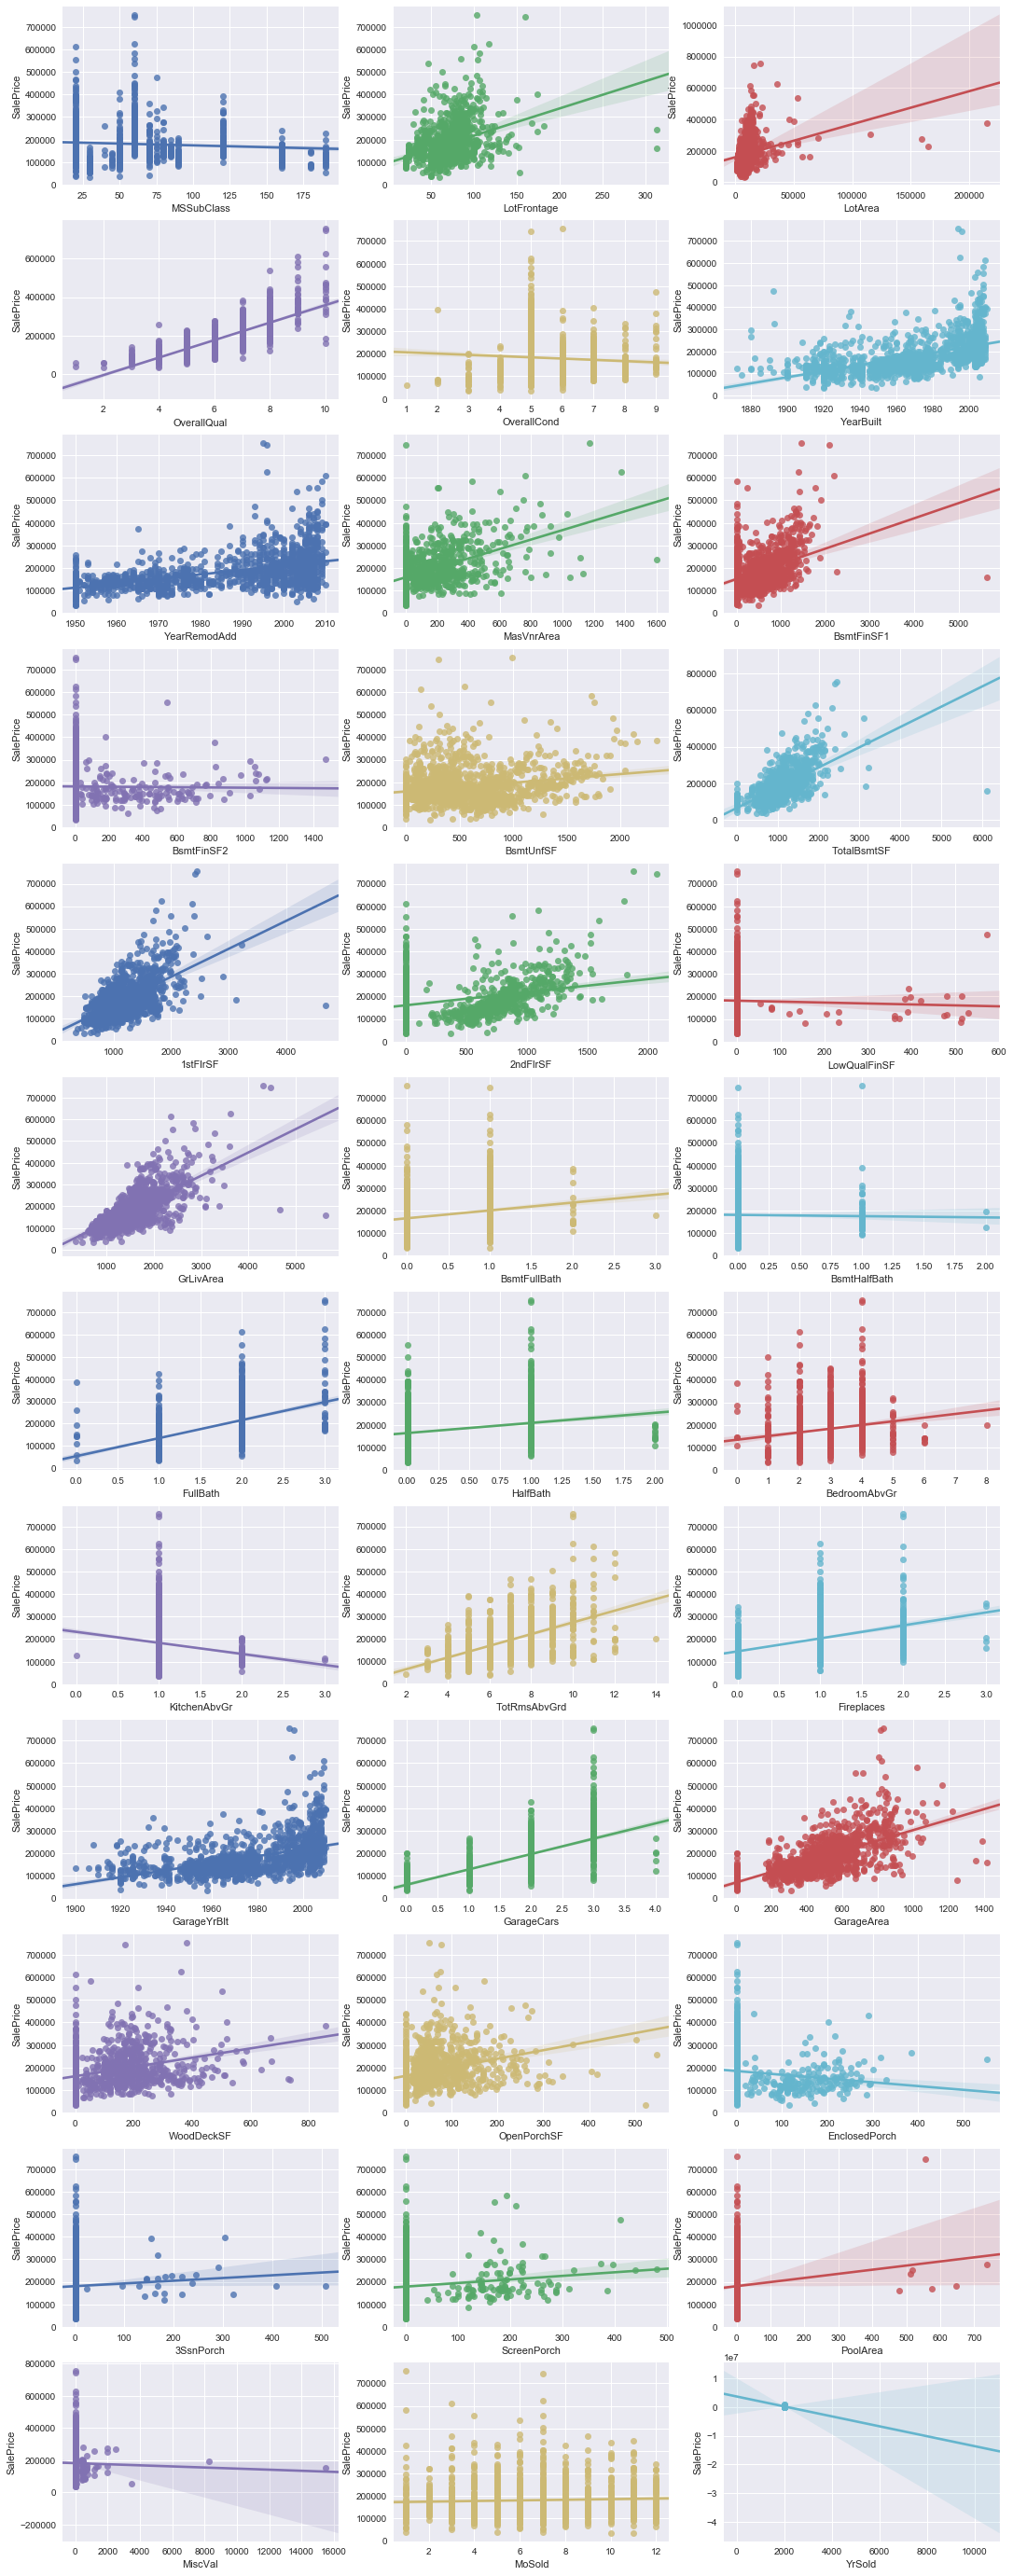

In [60]:
reg_plots(data, 'SalePrice')

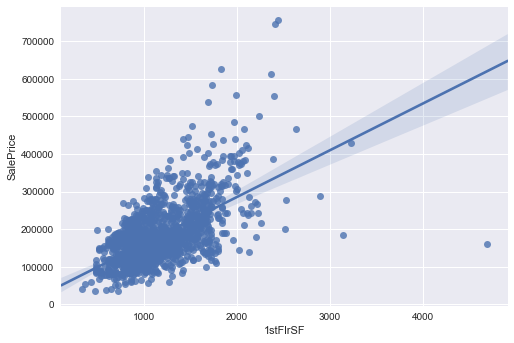

In [9]:
sns.regplot(data["1stFlrSF"], data["SalePrice"])

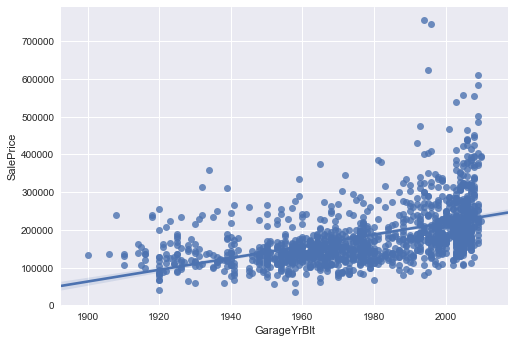

In [10]:
sns.regplot(data["GarageYrBlt"], data["SalePrice"])
# Not a good predictor 

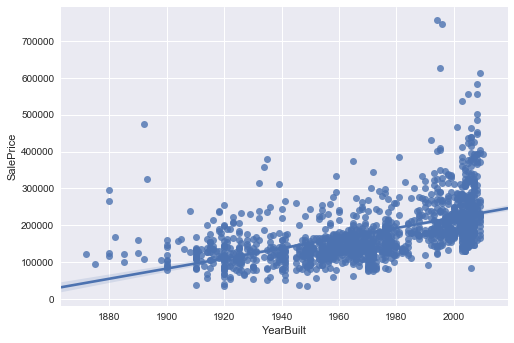

In [11]:
sns.regplot(data["YearBuilt"], data["SalePrice"])

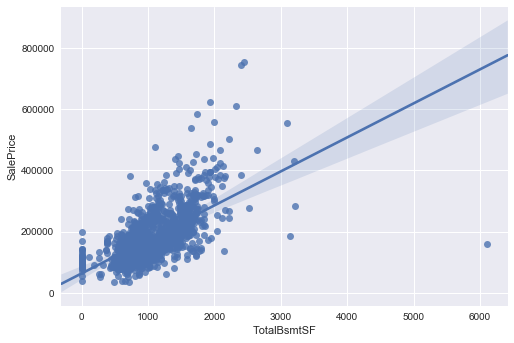

In [12]:
sns.regplot(data["TotalBsmtSF"], data["SalePrice"])

In [ ]:
# Set x and y axes 
x = data[["YearBuilt"]]
y = data[['SalePrice']]

# Split the data 
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)
# 0.33 = 33% saved for testing set 
# 0.67 = 67% saved for training + validation 

# Fitting model for training set
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_) 

# Why is RMSE calculated before the validation set is plotted? 
#It works when it's calculated after too. 

print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))
#print("Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_validation,regr.predict(x_validation))))
#print('R^2: %.2f' % regr.score(x_train, y_train))

# Apply same model to validation set and set trend line  
ax = plt.subplot(111)
plt.scatter(x_validation, y_validation, color = 'black')
plt.plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
ax.set_xlabel("Year Built")
ax.set_ylabel("Selling Price")

In [ ]:
x = data[["OverallQual"]]
y = data[['SalePrice']]

x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_)
print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))
#print("Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_validation,regr.predict(x_validation))))
#print('R^2: %.2f' % regr.score(x_train, y_train))


ax = plt.subplot(111)
plt.scatter(x_validation, y_validation, color = 'black')
plt.plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
ax.set_xlabel("Overall material and finish quality")
ax.set_ylabel("Selling Price")


In [ ]:
x = data[["GrLivArea"]]
y = data[['SalePrice']]

x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_)
print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))
#print("Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_validation,regr.predict(x_validation))))
#print('R^2: %.2f' % regr.score(x_train, y_train))

ax = plt.subplot(111)
plt.scatter(x_validation, y_validation, color = 'black')
plt.plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
ax.set_xlabel("Above grade (ground) living area square feet")
ax.set_ylabel("Selling Price")

In [ ]:
x = data[["GarageArea"]]
y = data[['SalePrice']]

x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_)
print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))
#print("Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_validation,regr.predict(x_validation))))
#print('R^2: %.2f' % regr.score(x_train, y_train))

ax = plt.subplot(111)
plt.scatter(x_validation, y_validation, color = 'black')
plt.plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
ax.set_xlabel("Garage Area")
ax.set_ylabel("Selling Price")

In [ ]:
x = data[["Fireplaces"]]
y = data[['SalePrice']]

x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_)
print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))
#print("Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_validation,regr.predict(x_validation))))
#print('R^2: %.2f' % regr.score(x_train, y_train))

ax = plt.subplot(111)
plt.scatter(x_validation, y_validation, color = 'black')
plt.plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
ax.set_xlabel("Number of fireplaces")
ax.set_ylabel("Selling Price")

# Surprisingly more relevant to sale price than overall condition rating (next cell)

In [ ]:
x = data[["OverallCond"]]
y = data[['SalePrice']]

x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_)
print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))
#print("Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_validation,regr.predict(x_validation))))
#print('R^2: %.2f' % regr.score(x_train, y_train))

ax = plt.subplot(111)
plt.scatter(x_validation, y_validation, color = 'black')
plt.plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
ax.set_xlabel("Overall condition rating")
ax.set_ylabel("Selling Price")

In [ ]:
x = data[["OverallCond", "Fireplaces"]]
y = data[['SalePrice']]

x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_)
print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))
#print("Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_validation,regr.predict(x_validation))))
#print('R^2: %.2f' % regr.score(x_train, y_train))


ax = plt.subplot(111)
plt.scatter(x_validation, y_validation, color = 'black')
plt.plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
ax.set_xlabel("")
ax.set_ylabel("Selling Price")

In [ ]:
data.hist("SalePrice", bins = 50)

In [ ]:
numericlist = data.select_dtypes(include='number')
numericlist.columns

In [62]:
# Verbatim from Rob's email: Try passing in all of the numeric variables.  You should be able to write a function that quickly grabs these 
# for you using some of the pandas functionality.  Does this improve your RMSE?

def linear_regression(df, target):
    columns = df.select_dtypes(include=['number']).drop(target, axis= 1).columns
    target = data[target]
    for i in range(len(columns)):
        x_train, x_validation, y_train, y_validation = train_test_split(df[columns[i]], target, test_size = 0.33, random_state = 42)
        regr = linear_model.LinearRegression()
        regr.fit(x_train, y_train)
        print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))